In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../api')  
from update_all_data import update_all_data

Inflow data fetched and saved to data/inflow_data.csv
netflow data fetched and saved to data/netflow_data.csv
reserve data fetched and saved to data/reserve_data.csv
price data fetched and saved to data/price_data.csv
Merged dataset saved to: data\merged_dataset.csv
All data fetched and merged successfully.


In [30]:
df = pd.read_csv("../data/merged_dataset.csv")


In [31]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.drop(columns=['datetime','start_time']).corr())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_time       10000 non-null  int64  
 1   datetime         10000 non-null  object 
 2   inflow_mean      10000 non-null  float64
 3   inflow_mean_ma7  10000 non-null  float64
 4   inflow_top10     10000 non-null  float64
 5   inflow_total     10000 non-null  float64
 6   netflow_total    10000 non-null  float64
 7   reserve          10000 non-null  float64
 8   reserve_usd      10000 non-null  float64
 9   close            10000 non-null  float64
 10  high             10000 non-null  float64
 11  low              10000 non-null  float64
 12  open             10000 non-null  float64
 13  volume           10000 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.1+ MB
None
         start_time   inflow_mean  inflow_mean_ma7  inflow_top10  \
count  1.000000e+04 

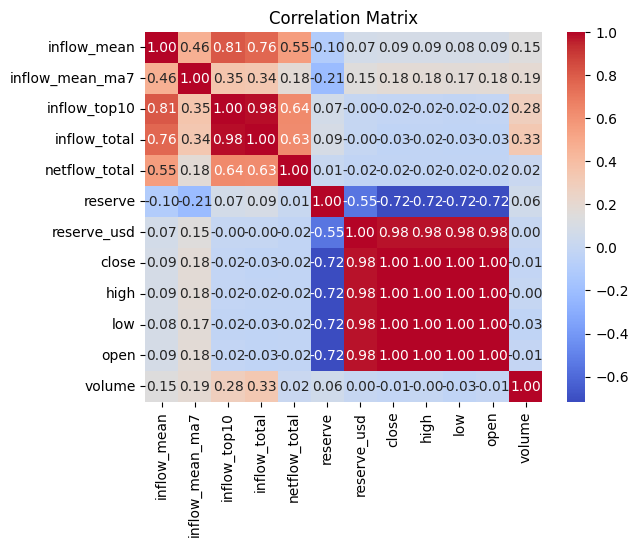

In [32]:

sns.heatmap(df.drop(columns=['datetime','start_time']).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

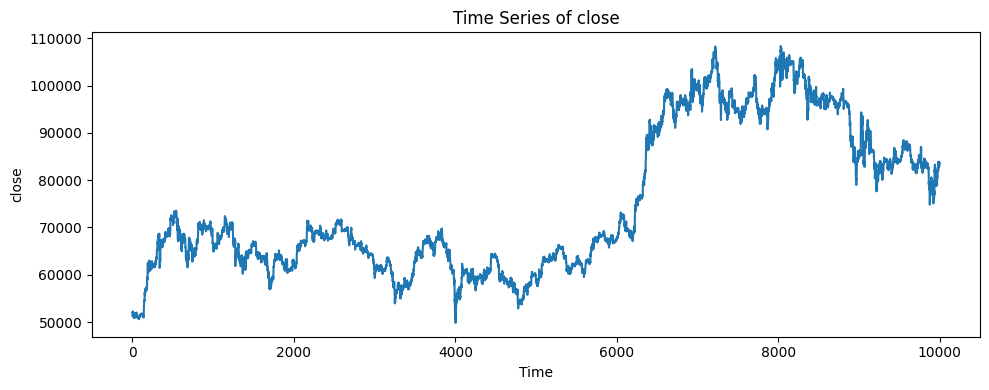

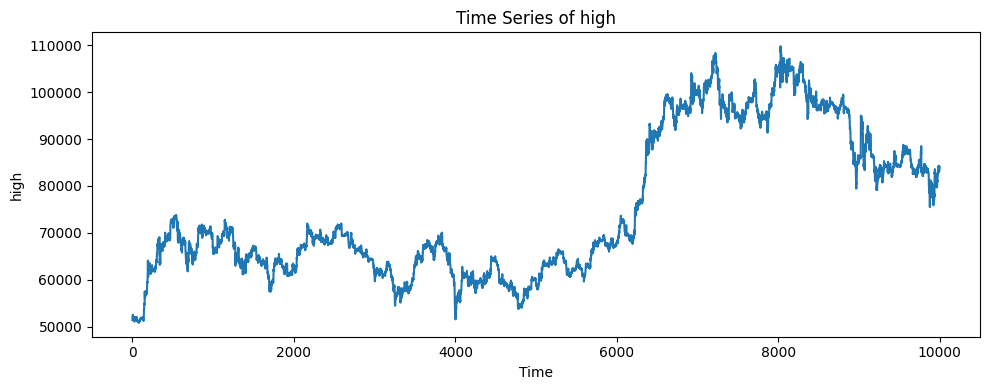

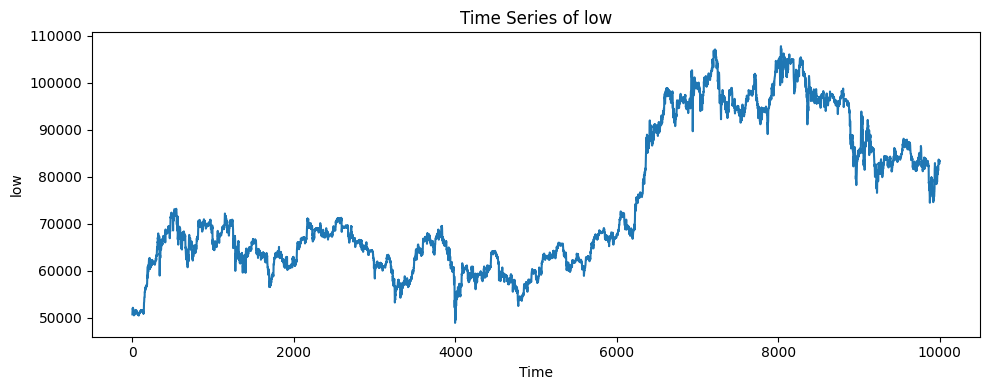

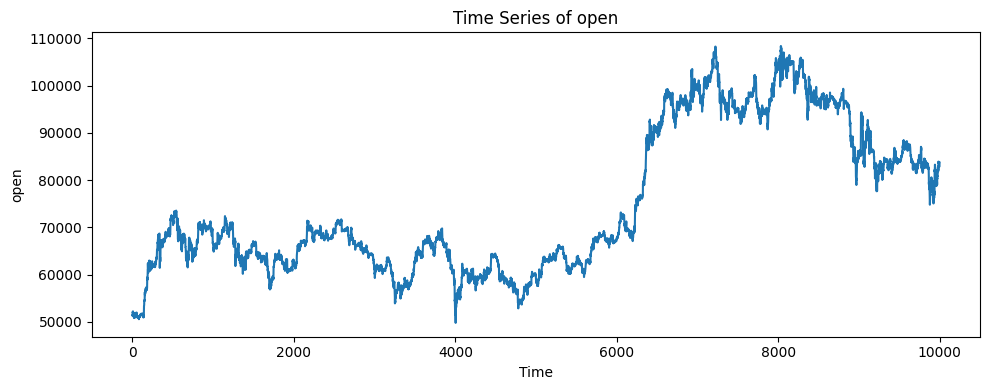

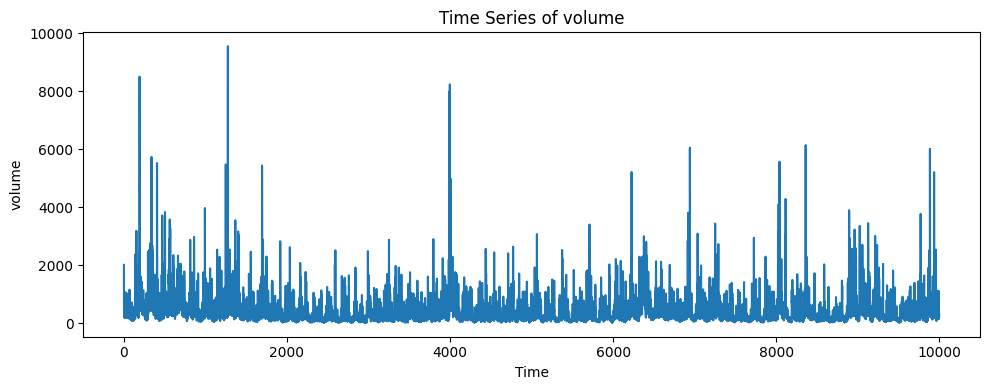

In [33]:
features_to_plot = ['close', 'high', 'low', 'open', 'volume']

for feature in features_to_plot:
    plt.figure(figsize=(10, 4))
    df[feature].plot()
    plt.title(f'Time Series of {feature}')
    plt.ylabel(feature)
    plt.xlabel("Time")
    plt.tight_layout()
    plt.show()

TypeError: text() missing 1 required positional argument: 's'

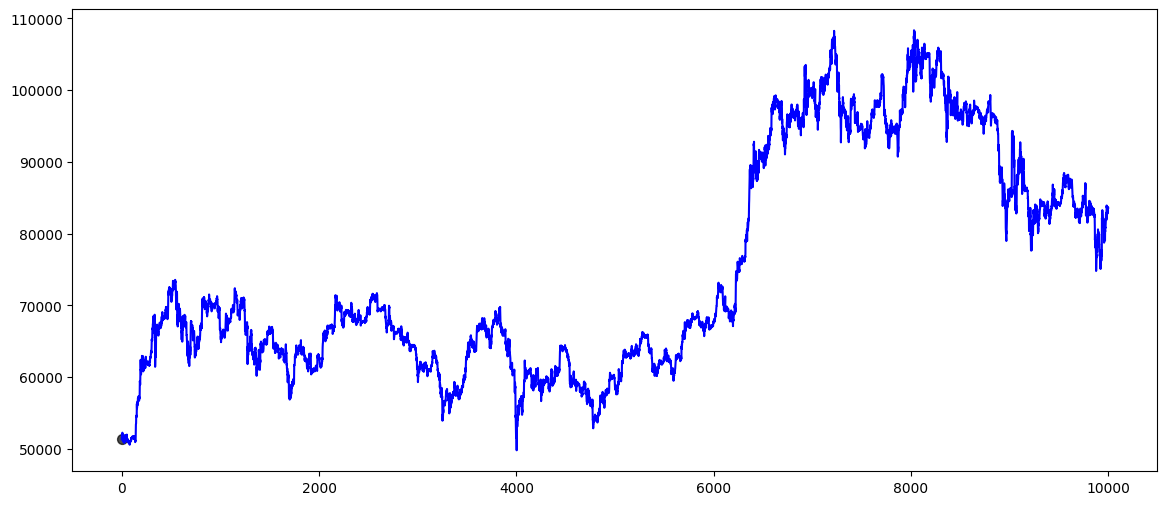

In [37]:
# Plot price over time
plt.figure(figsize=(14, 6))
df['close'].plot(label='Price (Close)', color='blue')

# Annotate result every 10 points
for i in range(0, len(df),20):
    time = df.index[i]
    price = df['close'].iloc[i]
    color = {'BUY': 'green', 'SELL': 'red', 'HOLD': 'gray'}.get(label, 'black')
    plt.scatter(time, price, color=color, s=50, label=label if i == 0 else "", alpha=0.7)
    plt.text(time, price, fontsize=8, color=color, ha='center')

plt.title("BTC Price with Prediction Labels (Every 10th Point)")
plt.xlabel("Time")
plt.ylabel("Price (Close)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
